#Autor: Daniel Francisco Ibarra García
#Proyecto Final Aprendizaje Automatico II

##Para realizar esta actividad se hará uso del dataset de Cancer de mama de Winsconsin, el cual es proporcionado en la pagina de Kaggle

In [110]:
import pandas as pd

In [111]:
cancer = pd.read_csv('data.csv')

In [112]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


##Primero limpiaremos el dataset, para ello removeremos las columnas innecesarias para lo que queremos realizar, en este caso siendo id y unnamed.

In [113]:
cancer.drop(['id','Unnamed: 32'], axis = 1, inplace = True)

In [114]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##Una vez nuestro dataset está limpio, utilizamos LabelEncoder con el fin de tranformar la columna de diagnostico en numeros, con el fin de que puedan ser utilizados en los distintos modelos.

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cancer['diagnosis'] = encoder.fit_transform(cancer['diagnosis'])
cancer.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##Separamos el dataset en las variables X y Y, X conteniendo los datos generales de los pacientes, y Y el diagnostico.

In [116]:
X = cancer.iloc[:,1:-1]
Y = cancer.iloc[:,0]
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

##Una vez tenemos nuestra separación, entrenamos las variables necesarias para los modelos, además de crear el tamaño de la muestra de prueba.

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 455 samples.
Testing set has 114 samples.


##Se importan los metodos a utilizar, en este caso usaremos 5 métodos, esto con el fin de tener una variedad grande de resultados, para poder seleccionar el más acertado.
##Estos metodos son Bagging, AdaBoost, RandomForest, GradientBoosting y Logistic Regression

In [120]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

clf_A = GradientBoostingClassifier()
clf_B = RandomForestClassifier()
clf_C = AdaBoostClassifier()
clf_D = BaggingClassifier()
clf_E = LogisticRegression()

resultado_A = clf_A.fit(X_train, y_train)
resultado_B = clf_B.fit(X_train, y_train)
resultado_C = clf_C.fit(X_train, y_train)
resultado_D = clf_D.fit(X_train, y_train)
resultado_E = clf_E.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##Con ayuda de los resultados obtenidos, se crean las variables de predicción y se evalua la precisión de estos modelos.

In [130]:
prediction_Atrain = clf_A.predict(X_train)
prediction_Atest = clf_A.predict(X_test)
print("La presición de entrenamiento del modelo GradientBoost es: ",accuracy_score(y_train,prediction_Atrain))
print("La presición de prueba del modelo GradientBoost es: ",accuracy_score(y_test,prediction_Atest))

prediction_Btrain = clf_B.predict(X_train)
prediction_Btest = clf_B.predict(X_test)
print("La presición de entrenamiento del modelo  RandomForest es: ",accuracy_score(y_train,prediction_Btrain))
print("La presición de prueba del modelo  RandomForest es: ",accuracy_score(y_test,prediction_Btest))

prediction_Ctrain = clf_C.predict(X_train)
prediction_Ctest = clf_C.predict(X_test)
print("La presición de entrenamiento del modelo AdaBoost es: ",accuracy_score(y_train,prediction_Ctrain))
print("La presición de prueba del modelo AdaBoost es: ",accuracy_score(y_test,prediction_Ctest))

prediction_Dtrain = clf_D.predict(X_train)
prediction_Dtest = clf_D.predict(X_test)
print("La presición de entrenamiento del modelo Bagging es: ",accuracy_score(y_train,prediction_Dtrain))
print("La presición de prueba del modelo Bagging es: ",accuracy_score(y_test,prediction_Dtest))

prediction_Etrain = clf_E.predict(X_train)
prediction_Etest = clf_E.predict(X_test)
print("La presición de entrenamiento del modelo Regresion Logistica es: ",accuracy_score(y_train,prediction_Etrain))
print("La presición de prueba del modelo Regresion Logistica es: ",accuracy_score(y_test,prediction_Etest))

La presición de entrenamiento del modelo GradientBoost es:  1.0
La presición de prueba del modelo GradientBoost es:  0.956140350877193
La presición de entrenamiento del modelo  RandomForest es:  1.0
La presición de prueba del modelo  RandomForest es:  0.9649122807017544
La presición de entrenamiento del modelo AdaBoost es:  1.0
La presición de prueba del modelo AdaBoost es:  0.956140350877193
La presición de entrenamiento del modelo Bagging es:  0.9956043956043956
La presición de prueba del modelo Bagging es:  0.9473684210526315
La presición de entrenamiento del modelo Regresion Logistica es:  0.9560439560439561
La presición de prueba del modelo Regresion Logistica es:  0.9473684210526315


##Por ultimo, se crean las matrices de confusión, con el fin de darnos una mejor vista de los resultados.

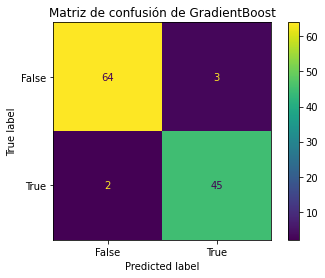

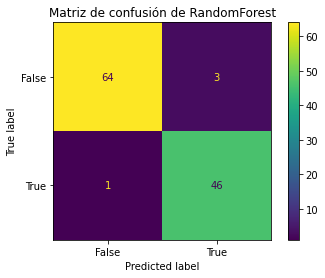

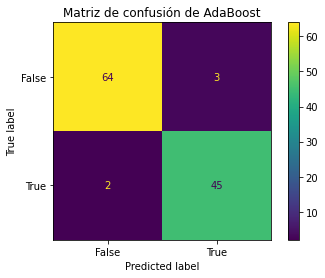

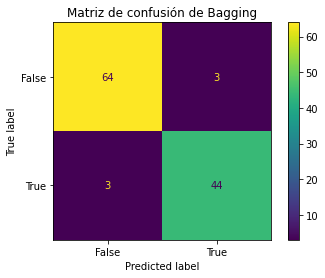

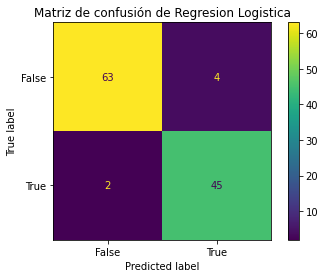

In [133]:
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrixA = metrics.confusion_matrix(y_test, prediction_Atest)
confusion_matrixB = metrics.confusion_matrix(y_test, prediction_Btest)
confusion_matrixC = metrics.confusion_matrix(y_test, prediction_Ctest)
confusion_matrixD = metrics.confusion_matrix(y_test, prediction_Dtest)
confusion_matrixE = metrics.confusion_matrix(y_test, prediction_Etest)
cm_displayA = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrixA, display_labels = [False, True])
cm_displayB = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrixB, display_labels = [False, True])
cm_displayC = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrixC, display_labels = [False, True])
cm_displayD = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrixD, display_labels = [False, True])
cm_displayE = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrixE, display_labels = [False, True])
cm_displayA.plot()
plt.title("Matriz de confusión de GradientBoost")
cm_displayB.plot()
plt.title("Matriz de confusión de RandomForest")
cm_displayC.plot()
plt.title("Matriz de confusión de AdaBoost")
cm_displayD.plot()
plt.title("Matriz de confusión de Bagging")
cm_displayE.plot()
plt.title("Matriz de confusión de Regresion Logistica")
plt.show()

##Conclusión:
###El modelo el cual obtuvo una mejor precisión fue el de RandomForest, esto en mi opinión tuvo que ser por el dataset utilizado, además que este modelo crea multiples arboles de decisión los cuales pueden ayudar a llegar a un resultado más acertado, lo cual es a lo que se llega en esta actividad. Al poseer una precisión de 96, se puede decir que el método es bastante preciso, y cumple con las espectativas de calidad, más en un área tan delicada como lo es la salud humana.